# Problem Statement

In [ ]:
Develop a model to find the variables that are significant in the demand for shared bikes with the available independent 
variables and report appropriate metrics of your model evaluation.

# Outcome

In [ ]:
The variables that are significant in predicting the demand for shared bikes (at least 3).

# Import Libraries

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
_
import warnings
warnings.filterwarnings("ignore")

# Read File

In [5]:
df = pd.read_csv("fgh.csv")
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [6]:
df.shape

(730, 16)

In [7]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


# EDA Part

## 1. season

In [10]:
df['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [11]:
df['season'].isna().sum()

0

<AxesSubplot:>

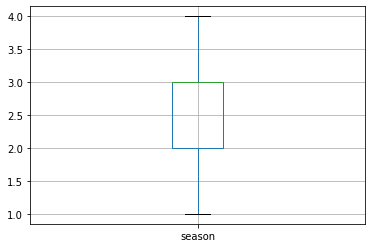

In [12]:
df[['season']].boxplot()

## 2. yr

In [13]:
df['yr'].value_counts()

0    365
1    365
Name: yr, dtype: int64

In [14]:
df['yr'].isna().sum()

0

<AxesSubplot:>

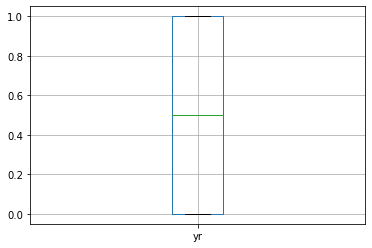

In [15]:
df[['yr']].boxplot()

## 3. mnth

In [16]:
df['mnth'].value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [17]:
df['mnth'].isna().sum()

0

<AxesSubplot:>

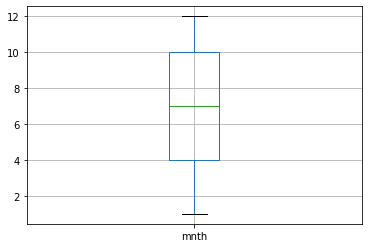

In [18]:
df[['mnth']].boxplot()

## 4. holiday

In [19]:
df['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [20]:
df['holiday'].isna().sum()

0

<AxesSubplot:>

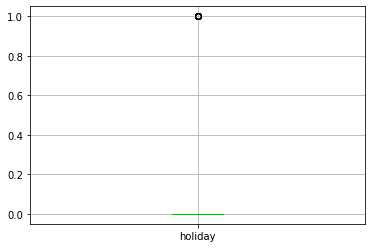

In [21]:
df[['holiday']].boxplot()

## 5. weekday

In [22]:
df['weekday'].value_counts()

1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64

In [23]:
df['weekday'].isna().sum()

0

<AxesSubplot:>

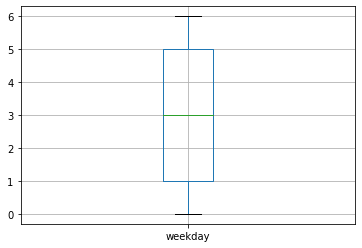

In [24]:
df[['weekday']].boxplot()

## 6. workingday

In [25]:
df['workingday'].value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [26]:
df['workingday'].isna().sum()

0

<AxesSubplot:>

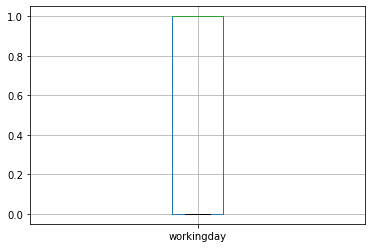

In [27]:
df[['workingday']].boxplot()

## 7. weathersit

In [28]:
df['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [29]:
df['weathersit'].isna().sum()

0

<AxesSubplot:>

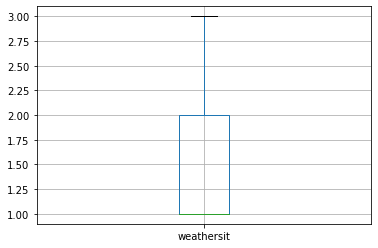

In [30]:
df[['weathersit']].boxplot()

## 8. temp

In [31]:
df['temp'].value_counts()

26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: temp, Length: 498, dtype: int64

In [32]:
df['temp'].isna().sum()

0

<AxesSubplot:>

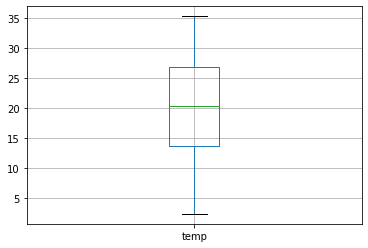

In [33]:
df[['temp']].boxplot()

## 9. atemp

In [34]:
df['atemp'].value_counts()

32.73440    4
18.78105    3
31.85040    3
28.59875    2
23.32625    2
           ..
28.94730    1
30.46145    1
30.10650    1
31.34500    1
11.17435    1
Name: atemp, Length: 689, dtype: int64

In [35]:
df['atemp'].isna().sum()

0

<AxesSubplot:>

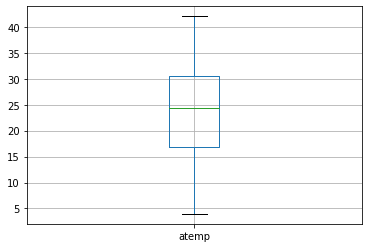

In [36]:
df[['atemp']].boxplot()

## 10. hum

In [37]:
df['hum'].value_counts()

61.3333    4
63.0833    3
55.2083    3
60.5000    3
56.8333    3
          ..
54.8333    1
56.1765    1
85.0000    1
76.1250    1
57.7500    1
Name: hum, Length: 594, dtype: int64

In [38]:
df['hum'].isna().sum()

0

<AxesSubplot:>

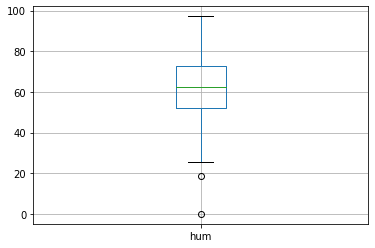

In [39]:
df[['hum']].boxplot()

## 11. windspeed

In [40]:
df['windspeed'].value_counts()

9.041918     3
11.166689    3
11.250104    3
15.333486    3
7.959064     3
            ..
12.416775    1
13.833289    1
14.250632    1
23.044181    1
10.374682    1
Name: windspeed, Length: 649, dtype: int64

In [41]:
df['windspeed'].isna().sum()

0

<AxesSubplot:>

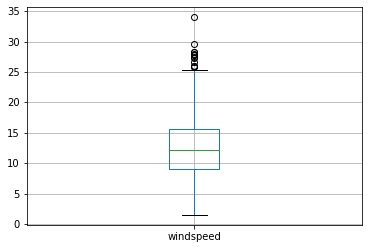

In [42]:
df[['windspeed']].boxplot()

In [43]:
# IQR method to handle outliers

q1 = df['windspeed'].quantile(0.25)
q2 = df['windspeed'].quantile(0.50)
q3 = df['windspeed'].quantile(0.75)

iqr = q3-q1

upper_tile = q3 + 1.5*iqr
lower_tile = q1 - 1.5*iqr

In [44]:
mean = df['windspeed'].loc[(df['windspeed'] < upper_tile)
                                  |(df['windspeed'] > lower_tile)].mean()

In [46]:
df['windspeed'].loc[(df['windspeed'] > upper_tile)
                                  |(df['windspeed'] < lower_tile)] = mean

<AxesSubplot:>

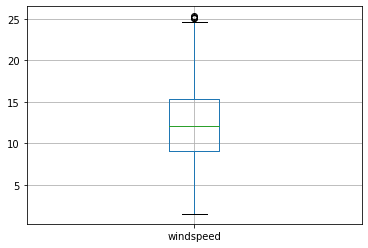

In [47]:
df[['windspeed']].boxplot()

## 12. casual

In [66]:
df['casual'].value_counts()

120     4
968     4
639     3
163     3
775     3
       ..
2521    1
1935    1
783     1
688     1
364     1
Name: casual, Length: 605, dtype: int64

In [67]:
df['casual'].isna().sum()

0

<AxesSubplot:>

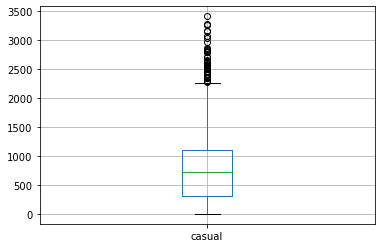

In [68]:
df[['casual']].boxplot()

In [48]:
# IQR method to handle outliers

q1 = df['casual'].quantile(0.25)
q2 = df['casual'].quantile(0.50)
q3 = df['casual'].quantile(0.75)

iqr = q3-q1

upper_tile = q3 + 1.5*iqr
lower_tile = q1 - 1.5*iqr

In [49]:
mean_casual = df['casual'].loc[(df['casual'] < upper_tile)
                                  |(df['casual'] > lower_tile)].mean()

In [50]:
df['casual'].loc[(df['casual'] > upper_tile)
                                  |(df['casual'] < lower_tile)] = mean_casual

<AxesSubplot:>

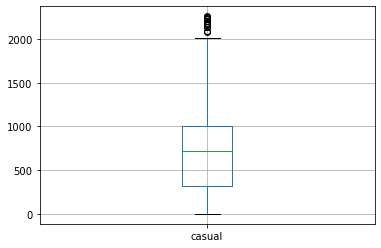

In [51]:
df[['casual']].boxplot()

## 13. registered

In [52]:
df['registered'].value_counts()

4841    3
6248    3
1707    3
3461    2
2713    2
       ..
4138    1
3231    1
4018    1
3077    1
2290    1
Name: registered, Length: 678, dtype: int64

In [53]:
df['registered'].isna().sum()

0

<AxesSubplot:>

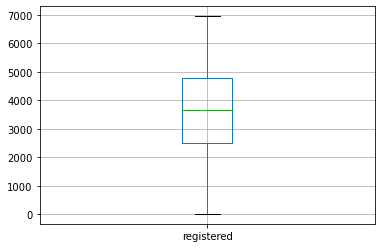

In [54]:
df[['registered']].boxplot()

# Feature Engineering

In [55]:
drop_list = ['instant','dteday']
df.drop(drop_list,axis = 1,inplace=True)
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331.0,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131.0,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120.0,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108.0,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82.0,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247.0,1867,2114
726,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644.0,2451,3095
727,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159.0,1182,1341
728,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364.0,1432,1796


# Feature Scaling

In [56]:
scaler = MinMaxScaler()
var = ['season','mnth','weekday','workingday','weathersit','temp','atemp','hum','windspeed','casual','registered','cnt']
df[var] = scaler.fit_transform(df[var])
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,0.0,0,0.0,0,0.166667,1.0,0.5,0.355170,0.373517,0.828620,0.388102,0.145833,0.091539,0.110792
1,0.0,0,0.0,0,0.333333,1.0,0.5,0.379232,0.360541,0.715771,0.635752,0.057181,0.093849,0.089623
2,0.0,0,0.0,0,0.500000,1.0,0.0,0.171000,0.144830,0.449638,0.635105,0.052305,0.174560,0.152669
3,0.0,0,0.0,0,0.666667,1.0,0.0,0.175530,0.174649,0.607131,0.387681,0.046986,0.207046,0.177174
4,0.0,0,0.0,0,0.833333,1.0,0.0,0.209120,0.197158,0.449313,0.462471,0.035461,0.216286,0.181546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,0.0,1,1.0,0,0.833333,1.0,0.5,0.243025,0.193709,0.671380,0.921356,0.108599,0.266676,0.240681
726,0.0,1,1.0,0,1.000000,0.0,0.5,0.241986,0.230993,0.606684,0.374116,0.284574,0.350996,0.353543
727,0.0,1,1.0,0,0.000000,0.0,0.5,0.241986,0.214393,0.774208,0.286721,0.069592,0.167774,0.151749
728,0.0,1,1.0,0,0.166667,1.0,0.0,0.245101,0.200348,0.497001,0.923102,0.160461,0.203869,0.204096


# Feature Selection

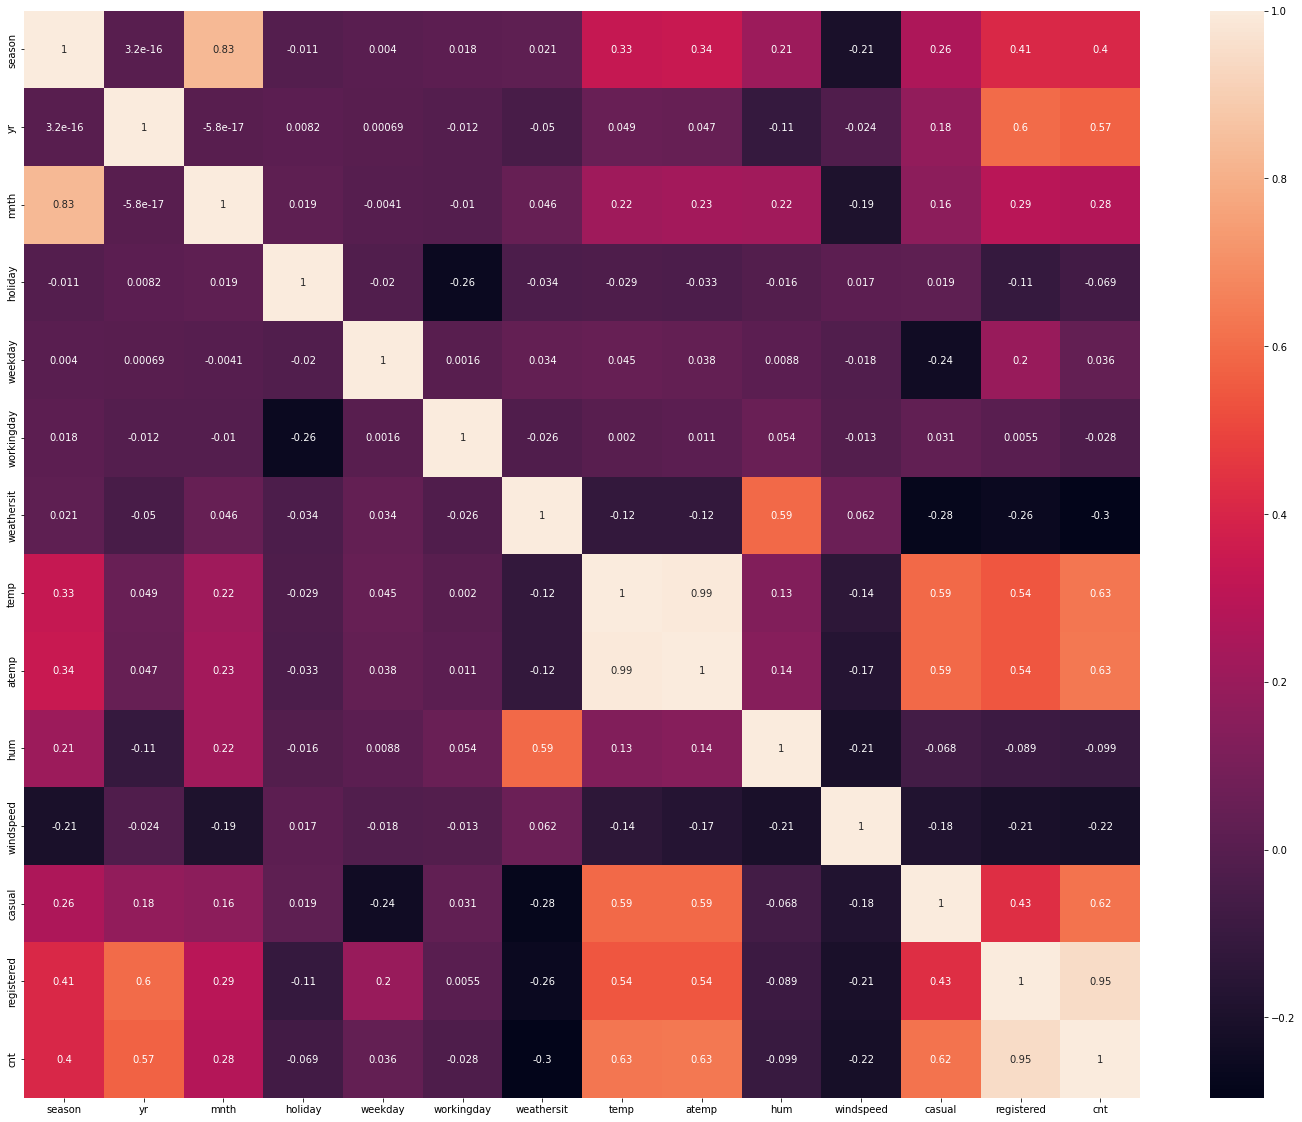

In [57]:
plt.figure(figsize = (25,20))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [58]:
df[df.columns[:]].corr()['cnt']

season        0.404584
yr            0.569728
mnth          0.278191
holiday      -0.068764
weekday       0.036183
workingday   -0.027640
weathersit   -0.295929
temp          0.627044
atemp         0.630685
hum          -0.098543
windspeed    -0.217623
casual        0.619825
registered    0.945411
cnt           1.000000
Name: cnt, dtype: float64

# Splitting the data for best 3 features

In [64]:
a = ['registered','casual','atemp']
x = df[a]
y = df['cnt']

# Train & Test Data Split

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

# Evaluation Metrics For Best 3 Features

In [ ]:
Evaluation metrics are used to measure the quality of a machine learning algorithm.
There are different types of evaluation metrics.

## 1. Mean Absolute Error

In [66]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [75]:
prediction = model.predict(x_test)
print('Best 3 Features :',mean_absolute_error(y_test,prediction))

Best 3 Features : 0.022399462426929386


## 2. Mean Squared Error

In [76]:
prediction = model.predict(x_test)
print('Best 3 Features :',mean_squared_error(y_test,prediction))

Best 3 Features : 0.0020716717126601546


## 3. Root Mean Sqared Error

In [77]:
print('Best 3 Features :',np.sqrt(mean_squared_error(y_test,prediction)))

Best 3 Features : 0.045515620534714835


## 4. R Square

In [78]:
print('Best 3 Features :',r2_score(y_test,prediction))

Best 3 Features : 0.9553008899012917


# Splitting the data for low correlation 3 features

In [79]:
a = ['windspeed','hum','weathersit']
x = df[a]
y = df['cnt']

# Train & Test Data Split

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

# Evaluation Metrics For Low 3 Features

## 1. Mean Absolute Error

In [81]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [82]:
prediction = model.predict(x_test)
print('Low corr 3 Features :',mean_absolute_error(y_test,prediction))

Low corr 3 Features : 0.17148933415969334


## 2. Mean Squared Error

In [83]:
prediction = model.predict(x_test)
print('Low corr 3 Features :',mean_squared_error(y_test,prediction))

Low corr 3 Features : 0.04339225516095794


## 3. Root Mean Sqared Error

In [84]:
print('Low corr 3 Features :',np.sqrt(mean_squared_error(y_test,prediction)))

Low corr 3 Features : 0.2083080775221113


## 4. R Square

In [85]:
print('Low corr 3 Features :',r2_score(y_test,prediction))

Low corr 3 Features : 0.06375359618134435


# Output Or Observation

In [ ]:
When all feature are consider. I see the some features are not contribute or not related to target column that why remove 
or drop this feature.I have use in heatmap and corr function, got highly correlated feature. But we required best 3 feature
among of all features.

In this model, 3 highly correlated features are 'atemp','casual','registered'. This 3 feature accuacy or contribution of this 
model is 95.53%.

In this model, 3 low correlated features are 'windspeed','weathersit','hum'. This 3 feature accuacy or contribution of this 
model is 6.37%.